# Insurance Cost Prediction Notebook


## 1. Import Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2. Load and Inspect Dataset

In [84]:
df = pd.read_csv('/content/insurance.csv')

In [85]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [87]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Distribution Plots

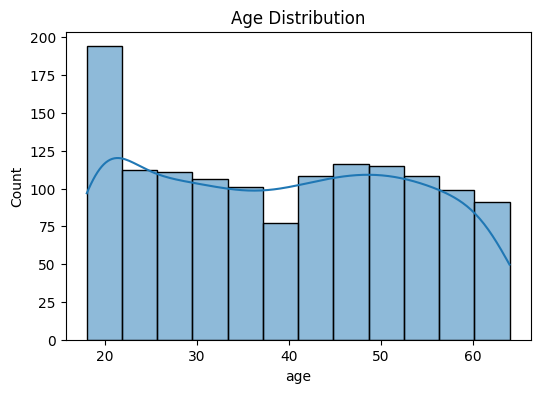

In [88]:
# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

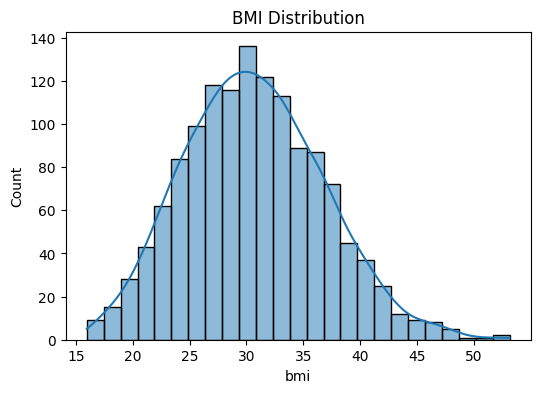

In [89]:
# Distribution of BMI
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

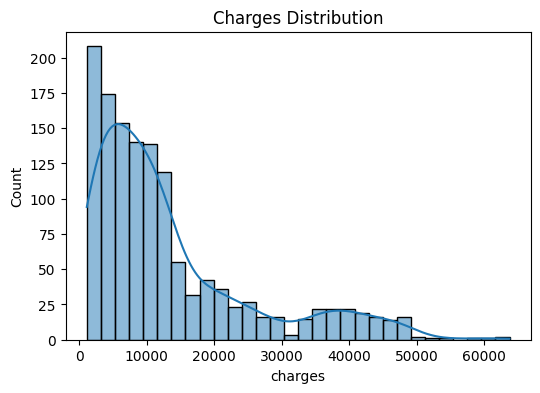

In [90]:
# Distribution of Chargers
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

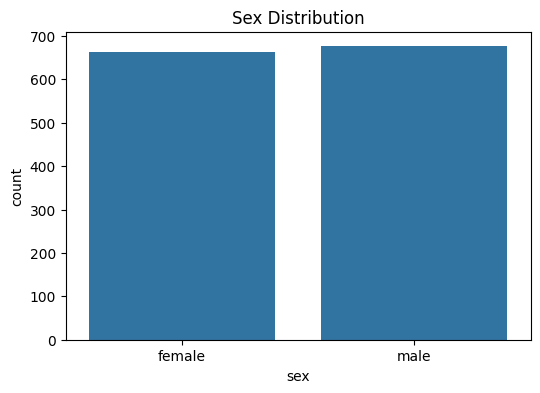

In [91]:
#Distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

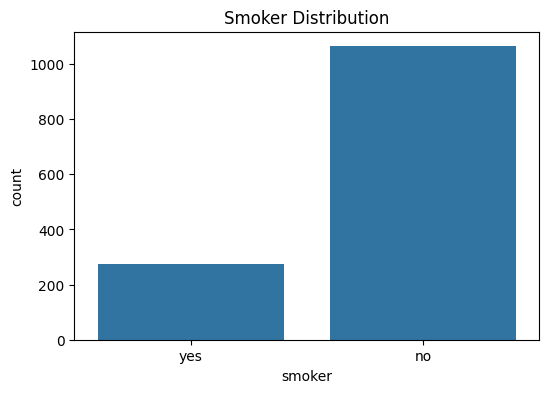

In [92]:
# Distribution of Smoker Category
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

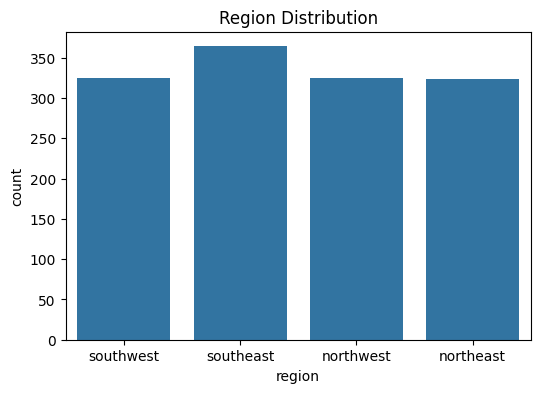

In [93]:
# Distriubtion of Region
plt.figure(figsize=(6,4))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

## 4. Data Preprocessing (Manual Encoding)

In [94]:
df.replace({'sex': {'male':0,'female':1},'smoker': {'yes':1,'no':0},'region': {'southeast':0,'southwest':1,'northeast':2,'northwest':3}},
          inplace=True)

/tmp/ipython-input-94-1281520505.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male':0,'female':1},'smoker': {'yes':1,'no':0},'region': {'southeast':0,'southwest':1,'northeast':2,'northwest':3}},


In [95]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


## 5. Features and Target

In [96]:
#Spliting into X(features) and y(target)
X = df.drop(columns='charges')
y = df['charges']

In [97]:
print('Features shape:', X.shape)
print('Target shape  :', y.shape)

Features shape: (1338, 6)
Target shape  : (1338,)


## 6. Train-Test Split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [99]:
print('Train set:', X_train.shape)
print('Test set :', X_test.shape)

Train set: (1070, 6)
Test set : (268, 6)


## 7. Model Training and Evaluation Function

In [100]:
def evaluate(model, model_name, X_train, y_train, X_test, y_test):
    # Train using features and targets
    model.fit(X_train, y_train)

    # Predict on the training data so we can check how well the model fits the training set
    train_predictions = model.predict(X_train)
    # Predict on the test data to see how well the model performs on the unseen data
    test_predictions = model.predict(X_test)


    # Calculate Mean Absolute Error on the test set (average absolute difference between predicted and actual values)
    mae = mean_absolute_error(y_test, test_predictions)
    # Calculate Mean Squared Error on the test set (average squared difference)
    mse = mean_squared_error(y_test, test_predictions)
    # Calculate Root Mean Squared Error by taking the square root of MSE (gives error in original units)
    rmse = np.sqrt(mse)

    # Calculate R² score on the training set (how well model explains training data)
    r2_train = r2_score(y_train, train_predictions)
    # Calculate R² score on the test set (how well model generalizes)
    r2_test = r2_score(y_test, test_predictions)

    # Print all the evaluation results
    print(f"{model_name}")
    print(f" R² train : {r2_train:.3f}")
    print(f" R² test  : {r2_test:.3f}")
    print(f" MAE test : {mae:.2f}")
    print(f" RMSE test: {rmse:.2f}\n")

    # Return test set predictions as the method's output
    return test_predictions


## 8. Train & Evaluate Models

In [101]:
# Linear Regression
lr = LinearRegression()
ev_lr = evaluate(lr, 'Linear Regression', X_train, y_train, X_test, y_test)

Linear Regression
 R² train : 0.752
 R² test  : 0.745
 MAE test : 4267.21
 RMSE test: 6191.69



In [102]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ev_ridge = evaluate(ridge, 'Ridge Regression', X_train, y_train, X_test, y_test)

Ridge Regression
 R² train : 0.751
 R² test  : 0.745
 MAE test : 4273.45
 RMSE test: 6190.80



In [103]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
ev_rf = evaluate(rf, 'Random Forest', X_train, y_train, X_test, y_test)

Random Forest
 R² train : 0.977
 R² test  : 0.836
 MAE test : 2769.77
 RMSE test: 4968.48



## 9. Feature Importance (Random Forest)

In [104]:
# Get the feature importance scores from the trained Random Forest model
importances = rf.feature_importances_

# Get the list of feature names from the dataset (column names of X)
feature_names = X.columns

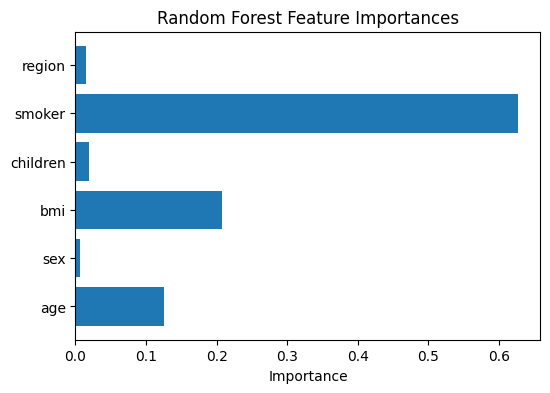

In [105]:
# Plot a horizontal bar chart of the importance of each feature according to the Random Forest model
# This helps us understand which features have the most impact on predicting insurance charges

plt.figure(figsize=(6,4))
plt.barh(feature_names, importances)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

## 10. Predictive System Example

In [106]:
sample = (18,0,36.85,0,1,2)  # age, sex(0 male), bmi, children, smoker(1 no), region(2 northeast)
# Actual value = $34,303.17
sample_arr = np.array(sample).reshape(1,-1)

In [107]:
# Print the prediction for the sample input
print('Linear:', lr.predict(sample_arr)[0])
print('Ridge :', ridge.predict(sample_arr)[0])
print('RandomForest:', rf.predict(sample_arr)[0])

Linear: 28491.7245846714
Ridge : 28385.38754610374
RandomForest: 36922.21512829999


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  return
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  return
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  return


## Conclusion

From the evaluation results, we can see that both the Linear Regression and Ridge Regression models behave very similarly, having mean absolute errors of around 28,400 to 28,500.

The Random Forest model, which is slightly less accurate when measured by MAE (at around 36,900), can identify more complex relationships between the data.

The linear models perform satisfactorily on this dataset, but the Random Forest could outperform them if we want to model more complex patterns or do more tuning.